In [23]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import layers, models, optimizers
from keras import regularizers

#from sklearn.feature_extraction.text import CountVectorizer

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #Descargo el data sets de las rewis, pero de cada reviw extringo solo las 1000 palabras más comunes

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/cesar/anaconda3/envs/ia/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/cesar/anaconda3/envs/ia/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

In [5]:
train_data.shape

(25000,)

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels.shape

(25000,)

Como las palabras estan vectorizadas, tengo que traer el indice de las palabras

In [8]:
word_index = imdb.get_word_index()

In [9]:
word_index 

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
for w in train_data[0]:
    print(word_index.get(w -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

## Vectorizar las palabras

In [12]:
def vectorizar(sequences, dim = 10000):
    vector = np.zeros((len(sequences),dim))
    
    for idx , w in enumerate(sequences):
        vector[idx,w] = 1
    return vector

In [13]:
vectorizar(train_data)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
X_train = vectorizar(train_data)
X_test  = vectorizar(test_data)

In [15]:
X_train.shape

(25000, 10000)

In [16]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

Creo la división de validación 

In [17]:
X_train_validation = X_train[:10000]
y_train_validation = y_train[:10000]

X_train = X_train[10000:]
y_train = y_train[10000:]

## Modelo

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= 'accuracy'
)

In [20]:
output = model.fit(
    X_train, y_train,
    epochs= 10,
    batch_size = 512,
    validation_data=(X_train_validation,y_train_validation))

Epoch 1/10
30/30 [==============================] - 3s 71ms/step - loss: 0.5045 - accuracy: 0.7817 - val_loss: 0.3768 - val_accuracy: 0.8644
Epoch 2/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2962 - accuracy: 0.9045 - val_loss: 0.3153 - val_accuracy: 0.8762
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2191 - accuracy: 0.9288 - val_loss: 0.2811 - val_accuracy: 0.8901
Epoch 4/10
30/30 [==============================] - 1s 20ms/step - loss: 0.1725 - accuracy: 0.9461 - val_loss: 0.2916 - val_accuracy: 0.8838
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1425 - accuracy: 0.9537 - val_loss: 0.2977 - val_accuracy: 0.8789
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1197 - accuracy: 0.9626 - val_loss: 0.3507 - val_accuracy: 0.8707
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1012 - accuracy: 0.9684 - val_loss: 0.3120 - val_accuracy: 0.8839
Epoch 8/10
30

In [21]:
history_dict = output.history
history_dict

{'loss': [0.5044517517089844,
  0.29621198773384094,
  0.21908068656921387,
  0.17247968912124634,
  0.14254505932331085,
  0.11973681300878525,
  0.10116938501596451,
  0.08505753427743912,
  0.06801964342594147,
  0.05808679759502411],
 'accuracy': [0.7816666960716248,
  0.9044666886329651,
  0.9287999868392944,
  0.946066677570343,
  0.9537333250045776,
  0.9625999927520752,
  0.9684000015258789,
  0.9754666686058044,
  0.9819333553314209,
  0.9844666719436646],
 'val_loss': [0.37679818272590637,
  0.3152546286582947,
  0.28113603591918945,
  0.291593998670578,
  0.2976643443107605,
  0.3507269024848938,
  0.3120262324810028,
  0.32840320467948914,
  0.3498123586177826,
  0.3778710961341858],
 'val_accuracy': [0.8644000291824341,
  0.8762000203132629,
  0.8901000022888184,
  0.8838000297546387,
  0.8788999915122986,
  0.8707000017166138,
  0.883899986743927,
  0.8791999816894531,
  0.8792999982833862,
  0.8769999742507935]}

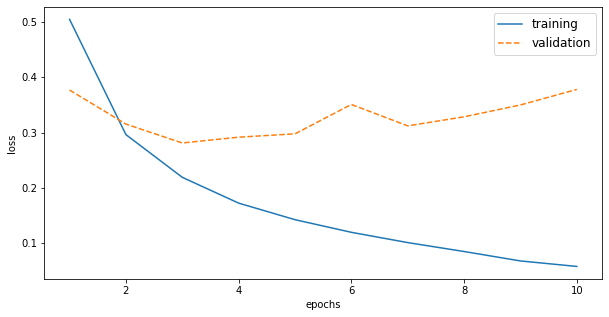

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'],'--', label='validation')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Es claro que le modelo sufre de overfiting

In [25]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8621


[0.41612038016319275, 0.8621199727058411]

## Combatir el Overfiting

### Simplificacion

In [26]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= 'accuracy'
)

output_s = model2.fit(
    X_train, y_train,
    epochs= 10,
    batch_size = 512,
    validation_data=(X_train_validation,y_train_validation))

Epoch 1/10
30/30 [==============================] - 3s 79ms/step - loss: 0.6159 - accuracy: 0.6318 - val_loss: 0.5669 - val_accuracy: 0.7366
Epoch 2/10
30/30 [==============================] - 1s 20ms/step - loss: 0.5209 - accuracy: 0.7975 - val_loss: 0.5181 - val_accuracy: 0.8033
Epoch 3/10
30/30 [==============================] - 1s 19ms/step - loss: 0.4694 - accuracy: 0.8615 - val_loss: 0.4879 - val_accuracy: 0.8612
Epoch 4/10
30/30 [==============================] - 1s 19ms/step - loss: 0.4324 - accuracy: 0.8967 - val_loss: 0.4668 - val_accuracy: 0.8594
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.4022 - accuracy: 0.9191 - val_loss: 0.4603 - val_accuracy: 0.8463
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.3766 - accuracy: 0.9360 - val_loss: 0.4434 - val_accuracy: 0.8682
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.3525 - accuracy: 0.9490 - val_loss: 0.4526 - val_accuracy: 0.8503
Epoch 8/10
30

In [27]:
history_dict_s = output_s.history

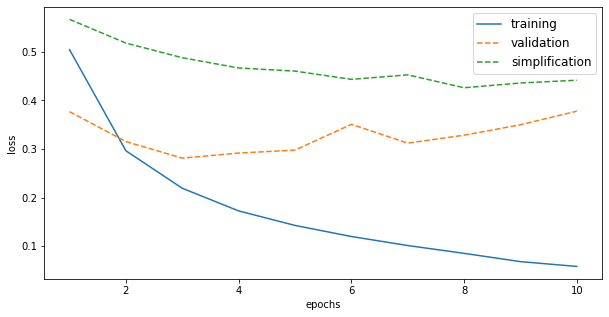

In [28]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'],'--', label='validation')
plt.plot(range(1,len(history_dict_s['loss'])+1),history_dict_s['val_loss'],'--', label='simplification')
plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Una de las formas mas simples de combatir el overfiting, es el simplificar nuestro modelo

### Regularizacion

In [29]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape = (10000,), kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= 'accuracy'
)

output_r = model3.fit(
    X_train, y_train,
    epochs= 10,
    batch_size = 512,
    validation_data=(X_train_validation,y_train_validation))

Epoch 1/10
30/30 [==============================] - 3s 33ms/step - loss: 0.5785 - accuracy: 0.7738 - val_loss: 0.4592 - val_accuracy: 0.8683
Epoch 2/10
30/30 [==============================] - 1s 21ms/step - loss: 0.3852 - accuracy: 0.8944 - val_loss: 0.3719 - val_accuracy: 0.8852
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.3099 - accuracy: 0.9141 - val_loss: 0.3608 - val_accuracy: 0.8781
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2648 - accuracy: 0.9305 - val_loss: 0.3408 - val_accuracy: 0.8839
Epoch 5/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2386 - accuracy: 0.9407 - val_loss: 0.3293 - val_accuracy: 0.8871
Epoch 6/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2252 - accuracy: 0.9433 - val_loss: 0.3352 - val_accuracy: 0.8852
Epoch 7/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2097 - accuracy: 0.9513 - val_loss: 0.3435 - val_accuracy: 0.8849
Epoch 8/10
30

In [30]:
history_dict_r = output_r.history

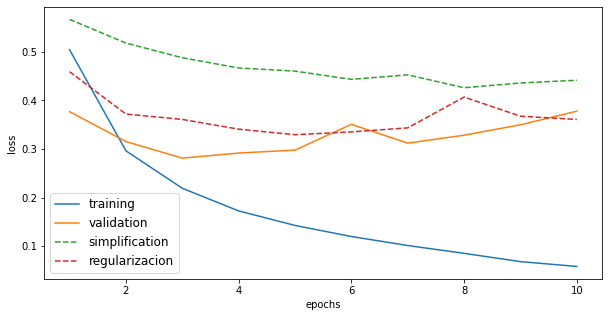

In [31]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'], label='validation')
plt.plot(range(1,len(history_dict_s['loss'])+1),history_dict_s['val_loss'],'--', label='simplification')
plt.plot(range(1,len(history_dict_s['loss'])+1),history_dict_r['val_loss'],'--', label='regularizacion')

plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Dropout

In [32]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape = (10000,), kernel_regularizer= regularizers.l2(0.001)))
model4.add(layers.Dropout((0.5))) #Se va a desactivar el 50%
model4.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model4.add(layers.Dropout((0.5)))  
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= 'accuracy'
)

output_d = model4.fit(
    X_train, y_train,
    epochs= 10,
    batch_size = 512,
    validation_data=(X_train_validation,y_train_validation))

Epoch 1/10
30/30 [==============================] - 1s 32ms/step - loss: 0.6364 - accuracy: 0.6760 - val_loss: 0.4928 - val_accuracy: 0.8543
Epoch 2/10
30/30 [==============================] - 1s 19ms/step - loss: 0.4954 - accuracy: 0.8035 - val_loss: 0.4099 - val_accuracy: 0.8743
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.4213 - accuracy: 0.8485 - val_loss: 0.3564 - val_accuracy: 0.8853
Epoch 4/10
30/30 [==============================] - 1s 20ms/step - loss: 0.3733 - accuracy: 0.8768 - val_loss: 0.3305 - val_accuracy: 0.8892
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.3342 - accuracy: 0.8961 - val_loss: 0.3294 - val_accuracy: 0.8861
Epoch 6/10
30/30 [==============================] - 1s 20ms/step - loss: 0.3068 - accuracy: 0.9115 - val_loss: 0.3195 - val_accuracy: 0.8910
Epoch 7/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2827 - accuracy: 0.9197 - val_loss: 0.3274 - val_accuracy: 0.8883
Epoch 8/10
30

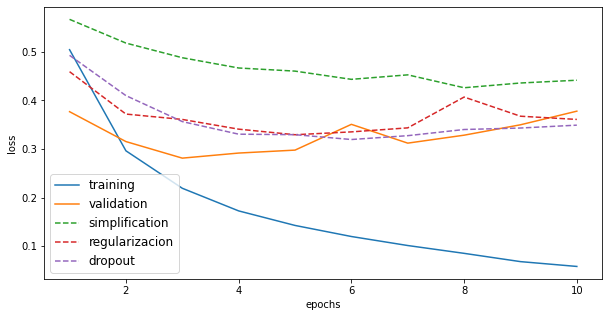

In [33]:
history_dict_d = output_d.history

plt.figure(figsize=(10,5))
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'], label='training')
plt.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'], label='validation')
plt.plot(range(1,len(history_dict_s['loss'])+1),history_dict_s['val_loss'],'--', label='simplification')
plt.plot(range(1,len(history_dict_s['loss'])+1),history_dict_r['val_loss'],'--', label='regularizacion')
plt.plot(range(1,len(history_dict_s['loss'])+1),history_dict_d['val_loss'],'--', label='dropout')


plt.legend( fontsize='large')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()